## Deadline
- E E 341 AA: Aug 4 at 2:20pm Aug 4 at 2:20pm
- E E 341 AB: Aug 6 at 12pm Aug 6 at 12pm	

## Lab 3
- Using FFT function
- Frequency shifting
- Starting from continuous time signals

# EE 341 - Lab 3
## Frequency Analysis using FFT
## Khoa Tran and Anup Paudel

### Import the important packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.io.wavfile as wav
import simpleaudio as sa

## Task1: Using the FFT fucntion
We examine three different signals: unshifted DFT, shifted DFT, and sifted DFT with Hertz frequency

In [2]:
# Example: Unshifted DFT

def unshifted_dft(f):
    # 0 <= n < 128
    n = np.arange(0, 127, 1)

    # the signal shown in the handout
    x = 1 + np.cos(2 * np.pi * f * n)

    # compute unshifted DFT of array x
    x_fft = fftpack.fft(x)
    
    # the indices of the output correspond to the range 0<= w < 2* np.pi
    w_fft = np.linspace(0, 2 * np.pi, len(n))

    # plot the result
    magnitude = np.abs(x_fft)
    plt.stem(w_fft, magnitude)
    plt.title('Unshifted FFT with f = {} Hz'.format(f))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

In [16]:
# define the frequency = 0.25
f1 = 0.25

C:\Users\tynou\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


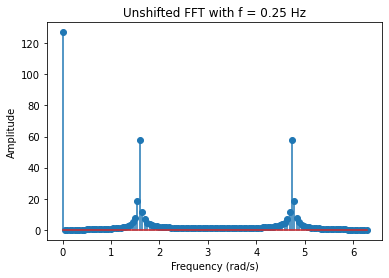

In [17]:
unshifted_dft(f1)

In [18]:
# Example: Shifted DFT

def shifted_dft(f):
    # 0 <= n < 128
    n = np.arange(0, 127, 1)

    # the signal shown in the handout
    x = 1 + np.cos(2 * np.pi * f * n)

    # compute unshifted DFT of array x
    x_fft = fftpack.fft(x)
    
    # To compute the shifted DFT, you can use the following command:
    x_fftshift = fftpack.fftshift(x_fft)

    # the indices correspond to the range -np.pi <= w < np.pi
    w_fftshift = np.linspace(-np.pi, np.pi, len(n))

    # plot the result
    magnitude = np.abs(x_fftshift)
    plt.stem(w_fftshift, magnitude)
    plt.title('Shifted FFT with f = {} Hz'.format(f))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')


C:\Users\tynou\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


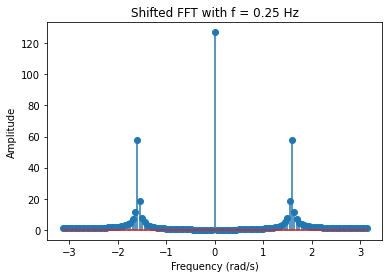

In [19]:
shifted_dft(f1)

In [24]:
def shifted_dft_hertz(f):
    # 0 <= n < 128
    n = np.arange(0, 127, 1)
    
    # the indices correspond to the range -np.pi <= w < np.pi
    w_fftshift_hertz = np.linspace(-180, 180, len(n))

    # plot the result
    plt.stem(w_fftshift_hertz, magnitue)
    plt.title('Shifted FFT with f = {} Hz'.format(f))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

C:\Users\tynou\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


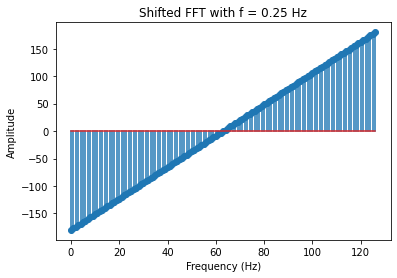

In [23]:
shifted_dft_hertz(f1)

In [168]:
# define the frequency = 0.5
f2 = 0.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


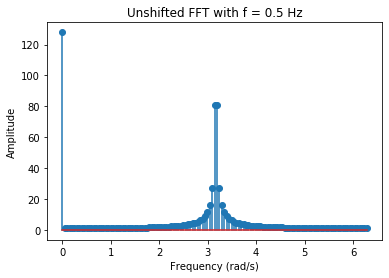

In [169]:
unshifted_dft(f2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


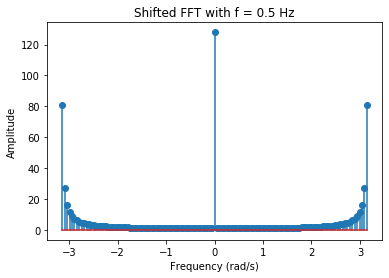

In [170]:
shifted_dft(f2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


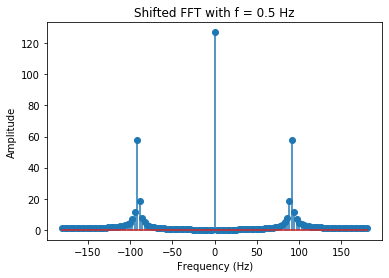

In [171]:
shifted_dft_hertz(f2)

## Task2: Frequency Shifting
Ploting magnitude and phase plots of given functions in order to view frequency shift.


In [58]:
# we have the following definition
f1 = 0.15
n = np.arange(0, 256) # 0<= n < 256
w_fftshift = np.linspace(-np.pi, np.pi, len(n)) # range: -np.pi <= w < np.pi

In [59]:
def frequency_shifting(x):    
    # First, we compute unshifted DFT of x[n]
    x_fft = fftpack.fft(x)

    # Then, we compute the shifted DFT by
    x_fftshift = fftpack.fftshift(x_fft)
    
    # plot the result
    plt.figure()
    magnitue = np.abs(x_fftshift)
    plt.plot(w_fftshift, magnitue)
    plt.title('Magnitue')
    plt.figure()
    phase = np.angle(x_fftshift)
    plt.plot(w_fftshift, phase)
    plt.title('Phase')
    plt.show()

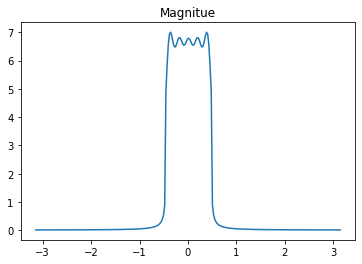

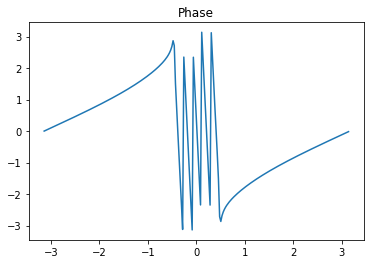

In [60]:
x1 = np.sinc(f1 * (n - 32)) # x1[n] as shown in the handout

frequency_shifting(x1)

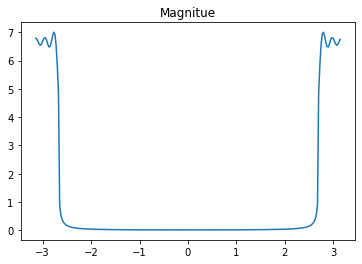

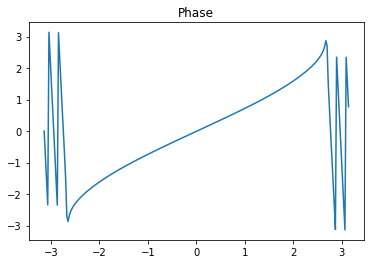

In [66]:
x2 = np.sinc(f1 * (n - 32)) * (-1) ** n # x2[n] as shown in the handout

frequency_shifting(x2)

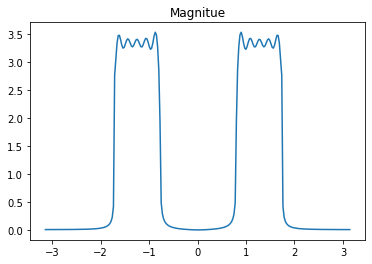

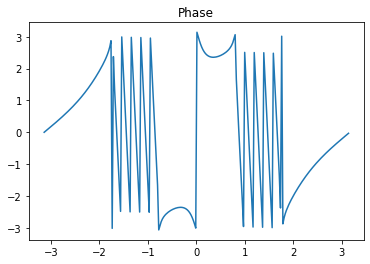

In [64]:
# we have the following definition
f2 = 0.2

x3 = np.sinc(f1 * (n - 32)) * np.cos(2 * np.pi * f2 * n) # x3[n] as shown in the handout

frequency_shifting(x3)

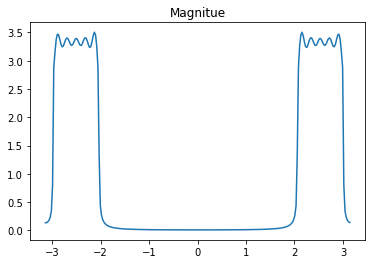

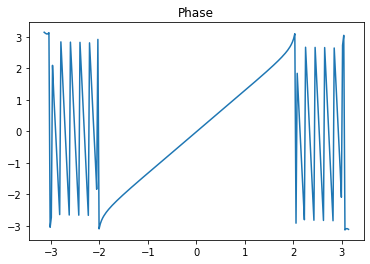

In [67]:
# we have the following definition
f3 = 0.4

x4 = np.sinc(f1 * (n - 32)) * np.cos(2 * np.pi * f3 * n) # x4[n] as shown in the handout

frequency_shifting(x4)

## Task3: Starting from Continuous Time Signals


In [25]:
# Load a WAV file. 
# Return the sampling rate and the sample array. 
def wav_load(file_name): 
    # Load the raw data. 
    sr, data = wav.read(file_name) 
    # Only use the first channel. 
    if data.ndim > 1: 
        data = data[:, 0] 
    
    # Convert to float32 quantization. 
    kind = data.dtype.kind 
    bits = data.dtype.itemsize * 8 
    data = data.astype('float32') 
    if kind == 'i' or kind == 'u': 
        data = data / 2 ** (bits - 1) 
        if kind == 'u': 
            data = data - 1 
    return sr, data

# Original file functions

In [74]:
def play_signal(file_name):
    # We load a WAV file, and display the signal in time domain
    sr, samples = wav_load(file_name)
    sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
    
    print('sampling rate = ', sr)
    print('number of samples = ', len(samples))
    
    plt.plot(samples)
    plt.title(('Waveform of {}'.format(file_name)))
    plt.xlabel('Time (ms)')   
    plt.ylabel('Amplitude')

In [77]:
def frequency_plot(file_name):
    sr, samples = wav_load(file_name)
    
    # Now, we compute shifted DFT just like in Task 1 and Task 2
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    fftshift = fftpack.fftshift(fftpack.fft(samples))
    plt.plot(w_fftshift, np.abs(fftshift))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

# Part A functions

In [83]:
def modified_play_signal_2b(file_name):
    sr, samples = wav_load(file_name)
    
    n = np.arange(0, len(samples))
    samples = samples * (-1) ** n
    
    sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
    
    print('sampling rate = ', sr)
    print('number of samples = ', len(samples))
    
    plt.plot(samples)
    plt.title(('Modified waveform of {} by (-1)^n'.format(file_name)))
    plt.xlabel('Time (ms)')   
    plt.ylabel('Amplitude')

In [88]:
def modified_frequency_plot_2b(file_name):
    sr, samples = wav_load(file_name)
 
    n = np.arange(0, len(samples))
    samples = samples * (-1) ** n
    
    # Now, we compute shifted DFT just like in Task 1 and Task 2
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    fftshift = fftpack.fftshift(fftpack.fft(samples))
    plt.plot(w_fftshift, np.abs(fftshift))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

In [86]:
def modified_play_signal_2c(file_name):
    sr, samples = wav_load(file_name)
    
    n = np.arange(0, len(samples))
    f2 = 0.2
    samples = samples * np.cos(2 * np.pi * f2 * n)
    
    sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done() 
    
    print('sampling rate = ', sr)
    print('number of samples = ', len(samples))
    
    plt.plot(samples)
    plt.title(('Modified waveform of {} by cosine'.format(file_name)))
    plt.xlabel('Time (ms)')   
    plt.ylabel('Amplitude')

In [91]:
def modified_frequency_plot_2c(file_name):
    sr, samples = wav_load(file_name)
 
    n = np.arange(0, len(samples))
    f2 = 0.2
    samples = samples * np.cos(2 * np.pi * f2 * n)
    
    # Now, we compute shifted DFT just like in Task 1 and Task 2
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    fftshift = fftpack.fftshift(fftpack.fft(samples))
    plt.plot(w_fftshift, np.abs(fftshift))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

# Part B functions

In [102]:
def modified_time_scaling_play_signal(file_name):
    sr, samples = wav_load(file_name)
    
    samples = samples[::2]
    
    sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
    
    print('sampling rate = ', sr)
    print('number of samples = ', len(samples))
    
    plt.plot(samples)
    plt.title(('Time scaled waveform of {}'.format(file_name)))
    plt.xlabel('Time (ms)')   
    plt.ylabel('Amplitude')

In [103]:
def modified_time_scaling_frequency_plot(file_name):
    sr, samples = wav_load(file_name)
    
    samples = samples[::2]
    
    # Now, we compute shifted DFT just like in Task 1 and Task 2
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    fftshift = fftpack.fftshift(fftpack.fft(samples))
    plt.plot(w_fftshift, np.abs(fftshift))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')

# Part C functions

In [202]:
def ideal_filter_sample_extropolation(file_name):
    sr, samples = wav_load(file_name)
    
    # First, we compute unshifted DFT of x[n]
    x_fft = fftpack.fft(samples)
    
    # Then, we compute the shifted DFT by
    x_fftshift = fftpack.fftshift(x_fft)
    
    # the indices of the output correspond to the range: -np.pi <= w < np.pi
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    
    #cutoff frequency
    fc = 0.25
    
    low_frequency = int(len(samples) * fc)
    center = int(len(samples) / 2)
    x_fftshift[center - low_frequency : center + low_frequency] = 0
    
    samples = fftpack.ifft(x_fftshift)
    
    return samples

In [203]:
def ideal_filter_modification_play_signal(file_name):   
    samples = ideal_filter_sample_extropolation(file_name)
    
    sa.play_buffer((samples * 32767).astype('int16'), 1, 2, sr).wait_done()
    
    print('sampling rate = ', sr)
    print('number of samples = ', len(samples))
    
    plt.plot(samples)
    plt.title(('Ideal filter waveform of {}'.format(file_name)))
    plt.xlabel('Time (ms)')   
    plt.ylabel('Amplitude')

In [204]:
def ideal_filter_modification_frequency_plot(file_name):
    samples = ideal_filter_sample_extropolation(file_name)
    
    
    # Now, we compute shifted DFT just like in Task 1 and Task 2
    w_fftshift = np.linspace(-np.pi, np.pi, len(samples))
    fftshift = fftpack.fftshift(fftpack.fft(samples))
    plt.plot(w_fftshift, np.abs(fftshift))
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Amplitude')
    

sampling rate =  22050
number of samples =  16609


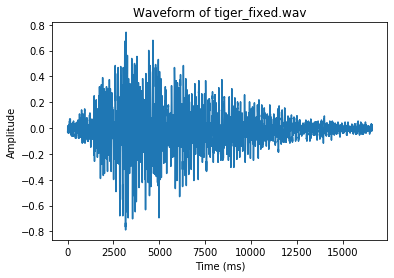

In [93]:
play_signal("tiger_fixed.wav")

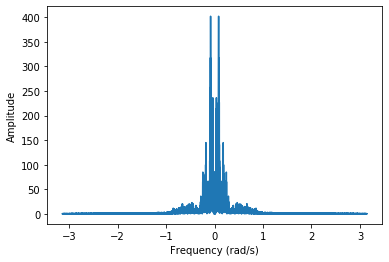

In [94]:
frequency_plot("tiger_fixed.wav")

sampling rate =  22050
number of samples =  16609


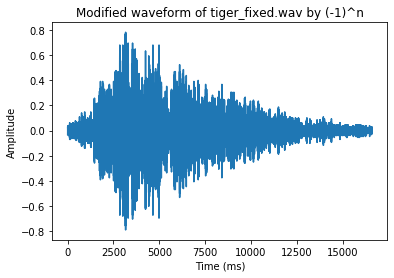

In [95]:
modified_play_signal_2b("tiger_fixed.wav")

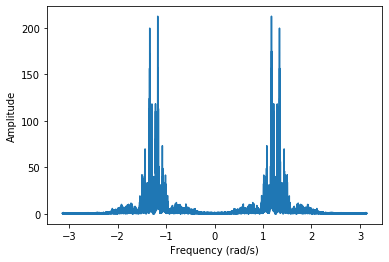

In [96]:
modified_frequency_plot_2b("tiger_fixed.wav")

sampling rate =  22050
number of samples =  16609


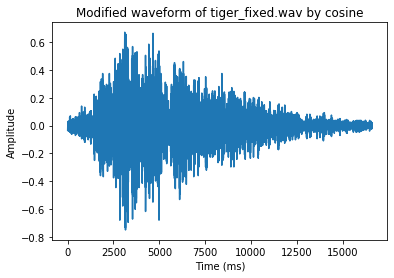

In [97]:
modified_play_signal_2c("tiger_fixed.wav")

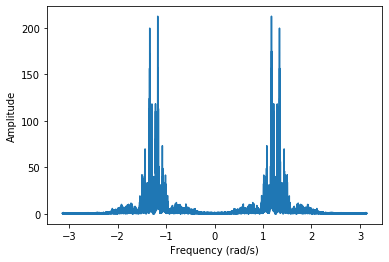

In [98]:
modified_frequency_plot_2c("tiger_fixed.wav")

sampling rate =  22050
number of samples =  8305


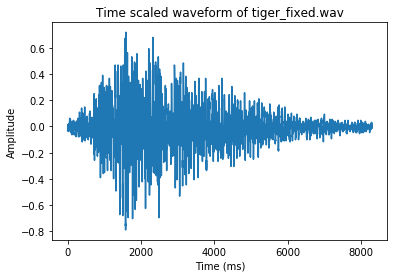

In [104]:
modified_time_scaling_play_signal("tiger_fixed.wav")

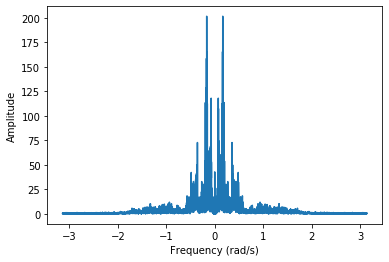

In [105]:
modified_time_scaling_frequency_plot("tiger_fixed.wav")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


sampling rate =  22050
number of samples =  16609


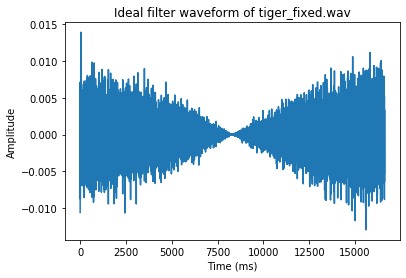

In [205]:
ideal_filter_modification_play_signal("tiger_fixed.wav")

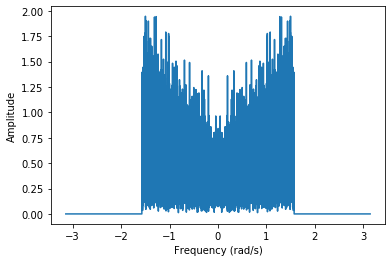

In [206]:
ideal_filter_modification_frequency_plot("tiger_fixed.wav")

sampling rate =  22050
number of samples =  25917


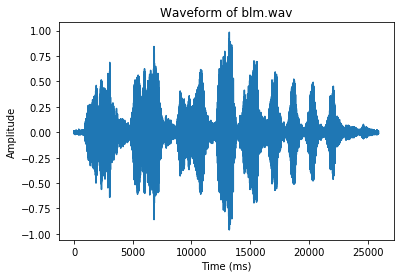

In [173]:
play_signal("blm.wav")

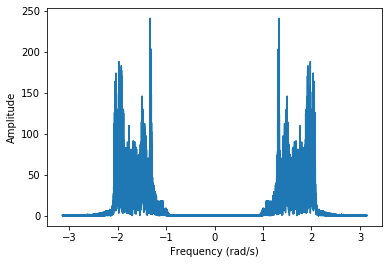

In [174]:
frequency_plot("blm.wav")

sampling rate =  22050
number of samples =  25917


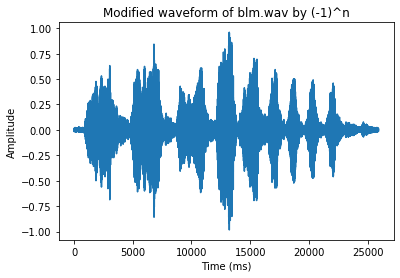

In [175]:
modified_play_signal_2b("blm.wav")

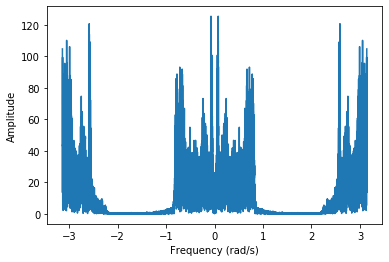

In [176]:
modified_frequency_plot_2b("blm.wav")

sampling rate =  22050
number of samples =  25917


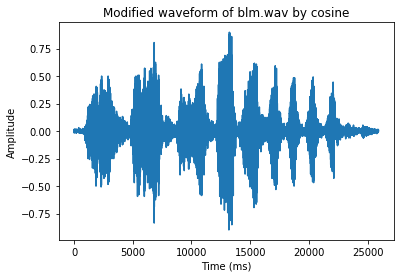

In [177]:
modified_play_signal_2c("blm.wav")

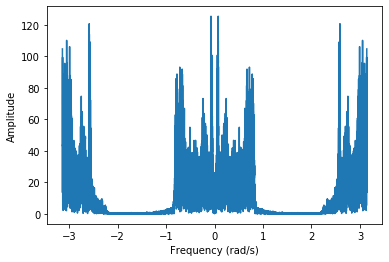

In [178]:
modified_frequency_plot_2c("blm.wav")

sampling rate =  22050
number of samples =  12959


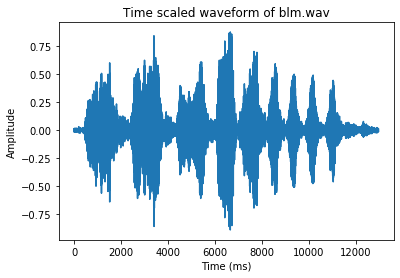

In [179]:
modified_time_scaling_play_signal("blm.wav")

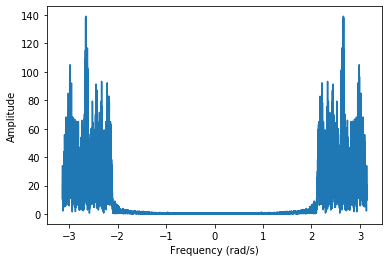

In [180]:
modified_time_scaling_frequency_plot("blm.wav")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


sampling rate =  22050
number of samples =  25917


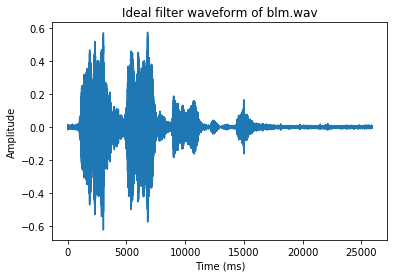

In [207]:
ideal_filter_modification_play_signal("blm.wav")

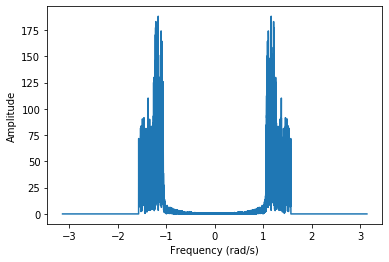

In [208]:
ideal_filter_modification_frequency_plot("blm.wav")